In [5]:
from src.functions import *

In [6]:
plt.rcParams.update(
    {
        "xtick.direction": "in",
        "ytick.direction": "out",
        "ytick.right": False,
        "xtick.top": False,
        "ytick.left": True,
        "xtick.bottom": False,
        "figure.facecolor": "1",
        "savefig.facecolor": "1",
        "savefig.dpi": 600,
        "figure.dpi": 600,
        "savefig.bbox": "tight",
        "font.size": 7,
        "font.family": "serif",
        "lines.markersize": 6,
        "lines.linewidth": 1,
        'axes.axisbelow' : True
    }
)

In [7]:
ra_exps = {}
schedule_opt = {}
loss_opt = {}

for n in range(4,9):
    ra_exps[n] = load_from_json(f'bo_cluster/n{n}_cubic_BO_TEST.json')
    schedule_opt[n] = ra_exps[n]['schedule_opt']
    loss_opt[n] = ra_exps[n]['loss_opt']

kappa = ra_exps[4]['kappa']
init_points = ra_exps[4]['init_points']
n_iter = ra_exps[4]['n_iter']
n_random_models = ra_exps[4]['n_random_models']
t_max = ra_exps[4]['t_max']
interpolator_kind = ra_exps[4]['interpolator_kind']

In [8]:
gamma_c = 0.45
upper_y_lim = 1.1

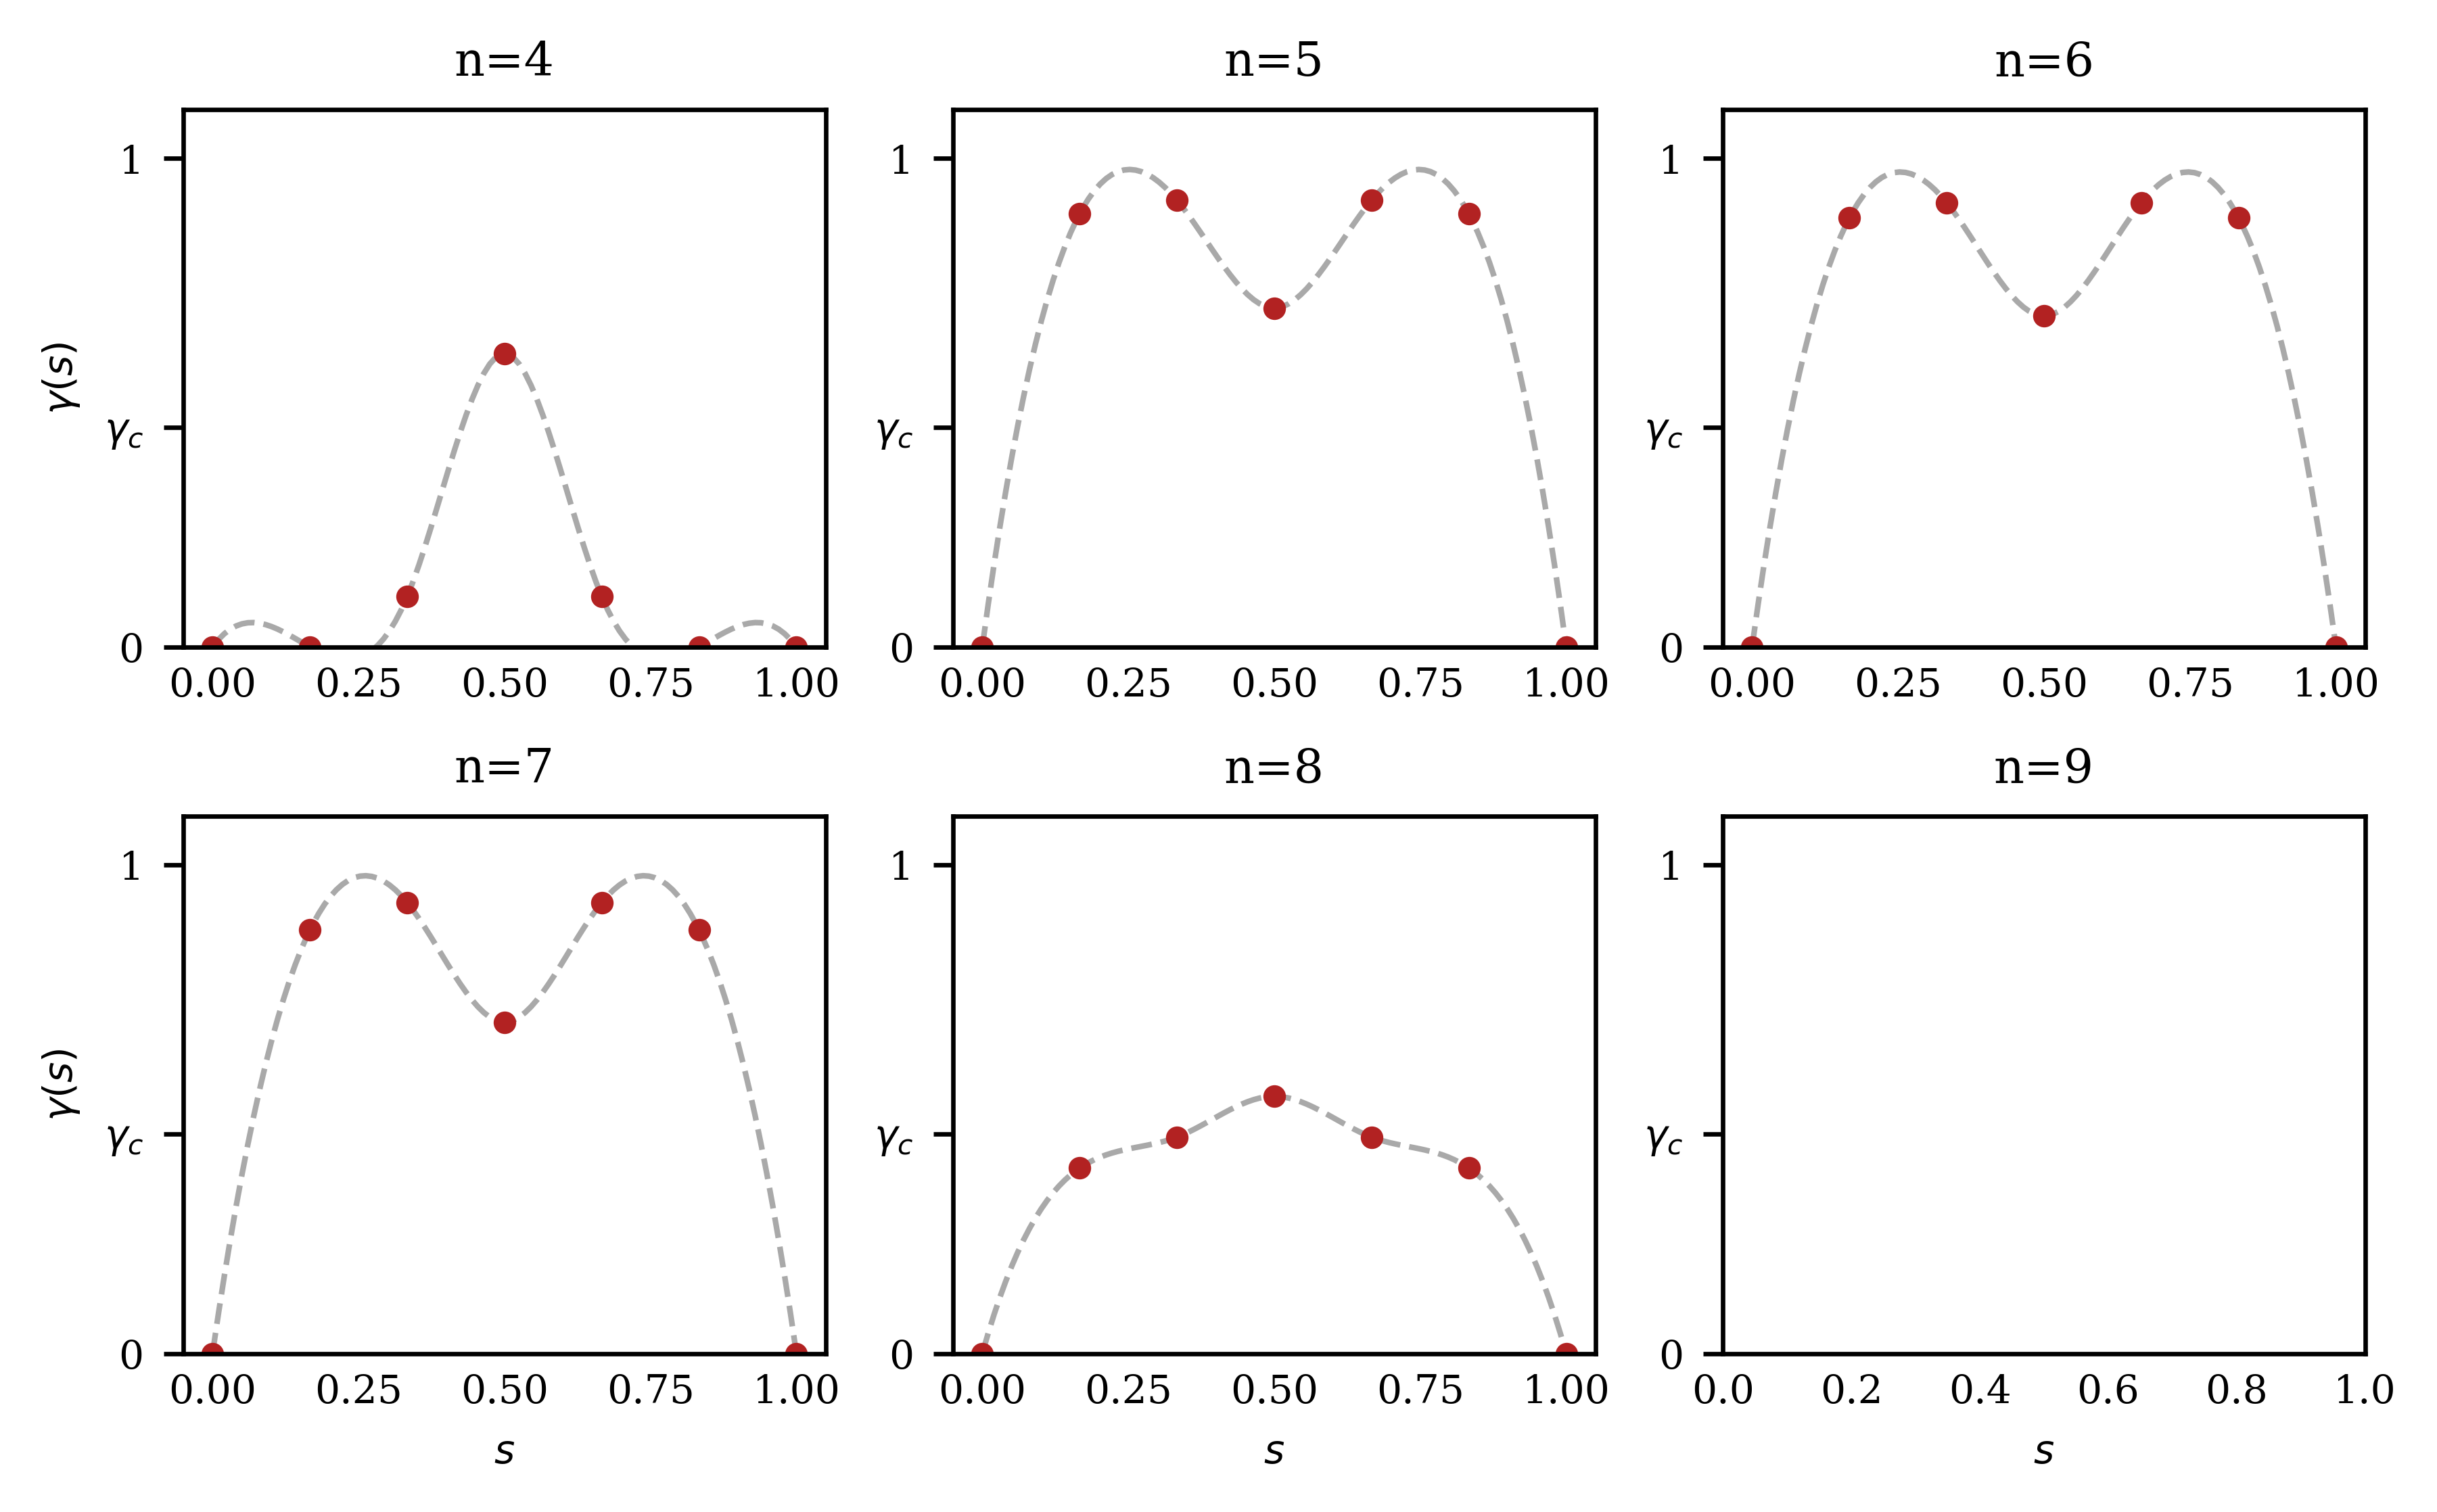

In [9]:
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(figure_size_x, figure_size_y))

n_points = 7
s = np.linspace(0,1,n_points)
x_cont = np.linspace(0,1,100)

schedule_interpolator_4 = get_schedule_interpolator(schedule_opt[4], kind=interpolator_kind)
axs[0, 0].plot(x_cont, schedule_interpolator_4(x_cont), '--', color = grey)
axs[0, 0].plot(s, schedule_opt[4], '.', color = red)

schedule_interpolator_4 = get_schedule_interpolator(schedule_opt[5], kind=interpolator_kind)
axs[0, 1].plot(x_cont, schedule_interpolator_4(x_cont), '--', color = grey)
axs[0, 1].plot(s, schedule_opt[5], '.', color = red)

schedule_interpolator_4 = get_schedule_interpolator(schedule_opt[6], kind=interpolator_kind)
axs[0, 2].plot(x_cont, schedule_interpolator_4(x_cont), '--', color = grey)
axs[0, 2].plot(s, schedule_opt[6], '.', color = red)

schedule_interpolator_4 = get_schedule_interpolator(schedule_opt[7], kind=interpolator_kind)
axs[1, 0].plot(x_cont, schedule_interpolator_4(x_cont), '--', color = grey)
axs[1, 0].plot(s, schedule_opt[7], '.', color = red)

schedule_interpolator_4 = get_schedule_interpolator(schedule_opt[8], kind=interpolator_kind)
axs[1, 1].plot(x_cont, schedule_interpolator_4(x_cont), '--', color = grey)
axs[1, 1].plot(s, schedule_opt[8], '.', color = red)

# schedule_interpolator_4 = get_schedule_interpolator(schedule_opt[9], kind=interpolator_kind)
# axs[1, 2].plot(x_cont, schedule_interpolator_4(x_cont), '--', color = grey)
# axs[1, 2].plot(s, schedule_opt[9], '.', color = red)

# Set labels
axs[1, 0].set_xlabel('$s$')
axs[1, 1].set_xlabel('$s$')
axs[1, 2].set_xlabel('$s$')

axs[0, 0].set_ylabel('$\gamma(s)$')
axs[1, 0].set_ylabel('$\gamma(s)$')

axs[0, 0].set_title('n=4')
axs[0, 1].set_title('n=5')
axs[0, 2].set_title('n=6')
axs[1, 0].set_title('n=7')
axs[1, 1].set_title('n=8')
axs[1, 2].set_title('n=9')

axs[0, 0].set_ylim(0,upper_y_lim)
axs[0, 0].set_yticks([0,gamma_c,1], labels=[0,'$\gamma_c$',1])

axs[0, 1].set_ylim(0,upper_y_lim)
axs[0, 1].set_yticks([0,gamma_c,1], labels=[0,'$\gamma_c$',1])

axs[0, 2].set_ylim(0,upper_y_lim)
axs[0, 2].set_yticks([0,gamma_c,1], labels=[0,'$\gamma_c$',1])

axs[1, 0].set_ylim(0,upper_y_lim)
axs[1, 0].set_yticks([0,gamma_c,1], labels=[0,'$\gamma_c$',1])

axs[1, 1].set_ylim(0,upper_y_lim)
axs[1, 1].set_yticks([0,gamma_c,1], labels=[0,'$\gamma_c$',1])

axs[1, 2].set_ylim(0,upper_y_lim)
axs[1, 2].set_yticks([0,gamma_c,1], labels=[0,'$\gamma_c$',1])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

fig.savefig(local_path+f'figures/bo_optimized_schedules')